## Multiplicate Euler's Method

Prototype implementation of a multiplicative version of Euler's Method.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def differential_linear(params):
    """
    The representation of the linear differential equation dy/dt = ky.
    Expects params as tuple (k, y).
    """
    
    k, y = params
    return k * y

def exact_diff_linear(k, y_0, t):
    """The exact value of a linear diff eq at t, for ratio k and initial value y_0"""
    
    return y_0 * np.e ** (k * t)

In [3]:
def classical_euler_method(diff_eq, params, y_0, t_f, t_0=0, N=1, plot=False):
    """
    Implementation of classical Euler's Method.
    ----------------------------------------
    Inputs - diff_eq: function call for the differential equation, including arguments
             params:  the parameters to be passed on to the diff eq, as a tuple
             y_0:     the y value at t_0
             t_f:     the endpoint in the approximation (the input at the value we are approximating)
             t_0:     the starting point of the approximation (default = 0)
             N:       the total number of intermediate points, including endpoint (default = 1)
             plot:    flag to plot the points on a graph
    ----------------------------------------
    Outputs - t_vals: the t values at each interpolated point (including start and end)
              y_vals: the approximated y values at interpolated point (including start and end)
    ----------------------------------------
    Other - delta_t:  the t distance of each iteration
            diff_val: function that return the differential's value at t
    """
    def diff_val(*args, **kwargs):
        return diff_eq(*args, **kwargs)
    
    
    t_vals, delta_t = np.linspace(t_0, t_f, N, retstep=True)
    
    y_vals = [y_0]
    for t in t_vals[1:]:
        y_vals.append(y_vals[-1] + delta_t * diff_val((params, y_vals[-1])))
    
    
    if plot:
        plt.plot(t_vals, y_vals)
        plt.scatter(t_vals, y_vals);
    
    return t_vals, y_vals

In [6]:
def mult_euler_method(diff_eq, params, y_0, t_f, t_0=0, N=1, plot=False):
    """
    Implementation of multiplicative Euler's Method.
    ----------------------------------------
    Inputs - diff_eq: function call for the differential equation, including arguments
             params:  the parameters to be passed on to the diff eq, as a tuple
             y_0:     the y value at t_0
             t_f:     the endpoint in the approximation (the input at the value we are approximating)
             t_0:     the starting point of the approximation (default = 0)
             N:       the total number of intermediate points, including endpoint (default = 1)
             plot:    flag to plot the points on a graph
    ----------------------------------------
    Outputs - t_vals: the t values at each interpolated point (including start and end)
              y_vals: the approximated y values at interpolated point (including start and end)
    ----------------------------------------
    Other - delta_t:  the t distance of each iteration
            diff_val: function that return the differential's value at t
    """
    def diff_val(*args, **kwargs):
        return diff_eq(*args, **kwargs)
    
    
    t_vals, delta_t = np.linspace(t_0, t_f, N, retstep=True)
    
    y_vals = [y_0]
    for t in t_vals[1:]:
        y_vals.append( y_vals[-1] * np.e ** (delta_t * diff_val((params, y_vals[-1])) / y_vals[-1]) )
    
    
    if plot:
        plt.plot(t_vals, y_vals)
        plt.scatter(t_vals, y_vals);
    
    return t_vals, y_vals

In [4]:
linear_params = {'diff_eq': differential_linear,
                'params': (-0.2),
                'y_0': 5,
                't_f': 2,
                't_0': 0,
                'N': 3,
                'plot': True}

Approximation error is 0.04523219350958704 of exact value


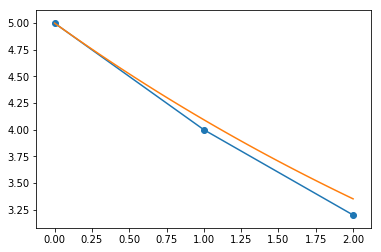

In [5]:
t_vals, y_vals = classical_euler_method(linear_params['diff_eq'],
                      linear_params['params'],
                      linear_params['y_0'],
                      linear_params['t_f'],
                      linear_params['t_0'],
                      linear_params['N'],
                      linear_params['plot'])

many_t_vals = np.linspace(linear_params['t_0'], linear_params['t_f'], 100)
exact_vals = [exact_diff_linear(linear_params['params'],
                               linear_params['y_0'],
                               t)
             for t in many_t_vals]

plt.plot(many_t_vals, exact_vals);

approx_ratio = abs( (y_vals[-1] - exact_vals[-1]) / exact_vals[-1] )
print('Approximation error is', approx_ratio, 'of exact value')

Approximation error is 1.3250065024206405e-16 of exact value


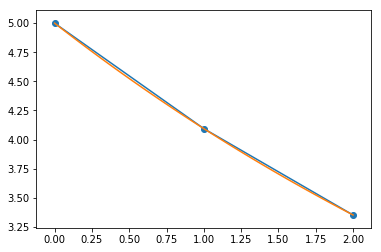

In [7]:
t_vals, y_vals = mult_euler_method(linear_params['diff_eq'],
                      linear_params['params'],
                      linear_params['y_0'],
                      linear_params['t_f'],
                      linear_params['t_0'],
                      linear_params['N'],
                      linear_params['plot'])

many_t_vals = np.linspace(linear_params['t_0'], linear_params['t_f'], 100)
exact_vals = [exact_diff_linear(linear_params['params'],
                               linear_params['y_0'],
                               t)
             for t in many_t_vals]

plt.plot(many_t_vals, exact_vals);

approx_ratio = abs( (y_vals[-1] - exact_vals[-1]) / exact_vals[-1] )
print('Approximation error is', approx_ratio, 'of exact value')